# Instances

In [1]:
import os
from collections import defaultdict

# Path to the labels directory
labels_dir = "/Users/umangshikarvar/Desktop/SRIP task/Dataset/labels"

# Dictionary to store label counts
label_count = defaultdict(int)

# Count total instances and label occurrences
total_instances = 0

for filename in os.listdir(labels_dir):
    if filename.endswith(".txt"):  # Ensure we process only .txt files
        with open(os.path.join(labels_dir, filename), "r") as f:
            for line in f:
                label = int(line.split()[0])  # Extract first number (label)
                label_count[label] += 1
                total_instances += 1

# Print results
print(f"Total number of solar panel instances: {total_instances}")
print("Label frequency distribution:")
for label, count in sorted(label_count.items()):
    print(f"Label {label}: {count} instances")

Total number of solar panel instances: 29625
Label frequency distribution:
Label 0: 29267 instances
Label 1: 130 instances
Label 2: 228 instances


# Area plot

Total number of solar panel instances: 29625
Mean area of solar panels (m²): 191.5178
Standard deviation of solar panel area (m²): 630.7003


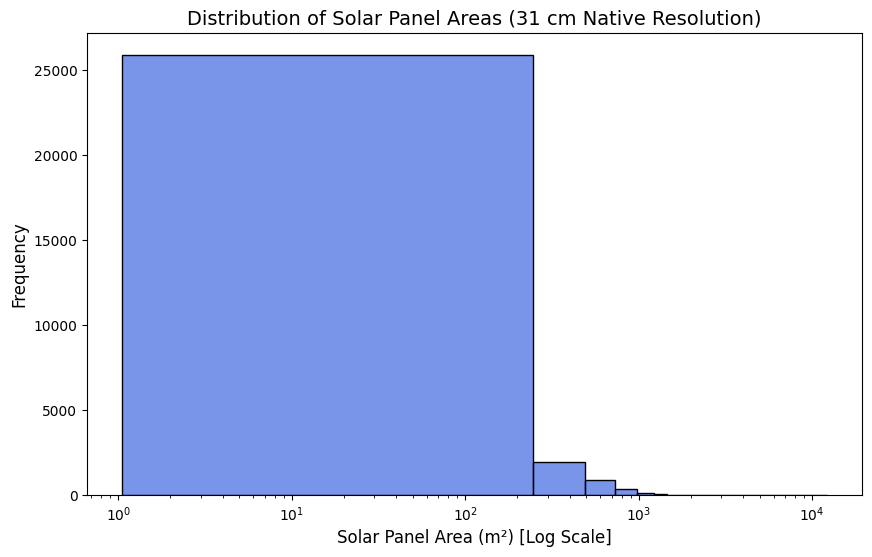

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Path to the labels directory
labels_dir = "/Users/umangshikarvar/Desktop/SRIP task/Dataset/labels"

# Scale factor for 31 cm native resolution (416x416 images)
image_size = 416
pixel_to_meter = 0.31  # 31 cm = 0.31 meters per pixel

# List to store areas
areas = []

# Read label files (only native resolution)
for filename in os.listdir(labels_dir):
    if filename.endswith(".txt") and "native" in filename.lower():  # Ensure it's a native image
        with open(os.path.join(labels_dir, filename), "r") as f:
            for line in f:
                parts = line.strip().split()
                _, _, _, width, height = map(float, parts)  # Extract width & height
                width_meters = width * image_size * pixel_to_meter  # Convert to meters
                height_meters = height * image_size * pixel_to_meter  # Convert to meters
                area_meters = width_meters * height_meters  # Compute area
                areas.append(area_meters)

# Compute statistics
mean_area = np.mean(areas)
std_area = np.std(areas)

# Print results
print(f"Total number of solar panel instances: {len(areas)}")
print(f"Mean area of solar panels (m²): {mean_area:.4f}")
print(f"Standard deviation of solar panel area (m²): {std_area:.4f}")

# Plot histogram
plt.figure(figsize=(10, 6))

# Histogram with log-scaled x-axis
sns.histplot(areas, bins=50, color="royalblue", alpha=0.7)

# Log scale for better visibility
plt.xscale("log")

# Titles and labels
plt.xlabel("Solar Panel Area (m²) [Log Scale]", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.title("Distribution of Solar Panel Areas (31 cm Native Resolution)", fontsize=14)

# Remove grid lines
plt.grid(False)

# Show the plot
plt.show()